## Motors BDC call data analysis 
- source : BMW Experience (by 원서현 주임) 
- period : 2023 1/1 ~ 9/6 (총 54,638건) 
- size : 54,638 rows x 84 columns (csv file, 35.1 MB) 
---

In [1]:
## 필수 pkg's 및 한글폰트 사용 설정 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('axes',unicode_minus=False)
plt.rcParams["figure.figsize"] = (8,3)

pd.set_option('display.max_columns', None)

In [2]:
## data loading 
df = pd.read_csv('data/bdc_data_20230908.csv', encoding='cp949')
df.shape

(54638, 84)

In [3]:
df.head(2)

,(접수)번호,(캠페인)번호,구분,캠페인유형,캠페인,Dynamics CRM 제목,DSS 제목,성명,성별,생년월일,휴대전화,E-MAIL,우편번호,주소,지역,딜러사,전시장,딜러,DSS ID,콜직원,신차 구입 예정 시기,직업,소개 고객정보,소개SC이름,보유차량,소유 차량명 및 모델,관심모델,취미,결혼 여부,차량 소유자 명/운전자 명,이전 행사 참여,행사 문의,행사물품 문의,기타 문의,프로모션 CODE,SNS 아이디,신청 이유,골프존 ID,골프존 닉네임,트림,외장 컬러,내장 컬러,선호 차종 정보,희망시승차종,시승동의 여부,시승동의서 동의 여부,등록일,"개인정보 수집, 이용 동의",개인정보 마케팅 활용 동의,Unnamed: 49,Unnamed: 50,Unnamed: 51,유입 매체,유입 채널,(UTM)기타,본인 인증,모바일여부,접근주소,BDC 종결 여부,Dynamics CRM 전송시간,DSS 전송시간,5,MEMO1,MEMO2,MEMO3,MEMO4,MEMO5,(MEMO)최초 저장 시간,(MEMO)마지막 저장 시간,Trade-In 견적상담 대상,UC 전시장,UC 영업사원,날짜,전시장.1,구분.1,캠페인.1,접수번호,NC,BPS,AS,상담직원,유입경로,성공,실패
0,959430,7476,상담신청,BDC,[BDC]서비스 입고 고객(삼천리 출고) 상담 유도 캠페인_2022.10_AS,[BDC]서비스 입고 고객(삼천리 출고) 상담 유도 캠페인_2022.10_AS,[BDC]서비스 입고 고객(삼천리 출고) 상담 유도 캠페인_2022.10_AS,이의정,NaN,NaN,010-6788-1578,NaN,NaN,NaN,충청/대전/강원,삼천리 모터스,천안 전시장,NaN,NaN,원서현,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-03 14:51:32,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,차대번호 : GA84735 보유차량 : 3GT 20d LCI 등록일자 : 2019-...,프로모션 문의 여부 : 관심시리즈:,서비스 문의 여부 : 문의 내용:,Trade-in 문의 여부 :,부재,2023-01-03 15:04:15,2023-01-03 15:04:15,N,NaN,NaN,2023-01-03,천안 전시장,상담신청,[BDC]서비스 입고 고객(삼천리 출고) 상담 유도 캠페인_2022.10_AS,959430,0,0,0,원서현,BDC,0,1
1,959429,7476,상담신청,BDC,[BDC]서비스 입고 고객(삼천리 출고) 상담 유도 캠페인_2022.10_AS,[BDC]서비스 입고 고객(삼천리 출고) 상담 유도 캠페인_2022.10_AS,[BDC]서비스 입고 고객(삼천리 출고) 상담 유도 캠페인_2022.10_AS,김희숙,NaN,NaN,010-9015-0411,NaN,NaN,NaN,충청/대전/강원,삼천리 모터스,천안 전시장,NaN,NaN,원서현,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-03 14:51:32,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,차대번호 : K736791 보유차량 : 320d LCI 등록일자 : 2019-01-...,프로모션 문의 여부 : 관심시리즈:,서비스 문의 여부 : 문의 내용:,Trade-in 문의 여부 :,부재,2023-01-03 15:07:07,2023-01-03 15:07:07,N,NaN,NaN,2023-01-03,천안 전시장,상담신청,[BDC]서비스 입고 고객(삼천리 출고) 상담 유도 캠페인_2022.10_AS,959429,0,0,0,원서현,BDC,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54638 entries, 0 to 54637
Data columns (total 84 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (접수)번호             54638 non-null  int64  
 1   (캠페인)번호            54638 non-null  int64  
 2   구분                 54638 non-null  object 
 3   캠페인유형              18896 non-null  object 
 4   캠페인                54638 non-null  object 
 5   Dynamics CRM 제목    54638 non-null  object 
 6   DSS 제목             54638 non-null  object 
 7   성명                 54638 non-null  object 
 8   성별                 2929 non-null   object 
 9   생년월일               3398 non-null   object 
 10  휴대전화               54638 non-null  object 
 11  E-MAIL             6926 non-null   object 
 12  우편번호               0 non-null      float64
 13  주소                 0 non-null      float64
 14  지역                 54638 non-null  object 
 15  딜러사                54638 non-null  object 
 16  전시장                546

In [5]:
## 불필요한 컬럼들이 지나치게 많음, 분석에 필요한 컬럼들만 가져온다. 
usable_columns = ['(접수)번호', '(캠페인)번호', '캠페인유형', '캠페인', '성명', '성별', '생년월일', '휴대전화', 'E-MAIL', 
                  '전시장', '딜러', '콜직원', '신차 구입 예정 시기', '결혼 여부', '이전 행사 참여', '희망시승차종' , 
                  '유입 매체', '유입 채널', '(UTM)기타', '모바일여부', '접근주소', 'BDC 종결 여부', 
                  'MEMO1','MEMO2', 'MEMO3', 'MEMO4', 'MEMO5', '날짜', 'NC', 'BPS', 'AS', '상담직원', '유입경로', '성공', '실패']

df_2 = df[usable_columns]
print(df_2.shape)
df_2.head(2)

(54638, 35)


,(접수)번호,(캠페인)번호,캠페인유형,캠페인,성명,성별,생년월일,휴대전화,E-MAIL,전시장,딜러,콜직원,신차 구입 예정 시기,결혼 여부,이전 행사 참여,희망시승차종,유입 매체,유입 채널,(UTM)기타,모바일여부,접근주소,BDC 종결 여부,MEMO1,MEMO2,MEMO3,MEMO4,MEMO5,날짜,NC,BPS,AS,상담직원,유입경로,성공,실패
0,959430,7476,BDC,[BDC]서비스 입고 고객(삼천리 출고) 상담 유도 캠페인_2022.10_AS,이의정,NaN,NaN,010-6788-1578,NaN,천안 전시장,NaN,원서현,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,차대번호 : GA84735 보유차량 : 3GT 20d LCI 등록일자 : 2019-...,프로모션 문의 여부 : 관심시리즈:,서비스 문의 여부 : 문의 내용:,Trade-in 문의 여부 :,부재,2023-01-03,0,0,0,원서현,BDC,0,1
1,959429,7476,BDC,[BDC]서비스 입고 고객(삼천리 출고) 상담 유도 캠페인_2022.10_AS,김희숙,NaN,NaN,010-9015-0411,NaN,천안 전시장,NaN,원서현,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,차대번호 : K736791 보유차량 : 320d LCI 등록일자 : 2019-01-...,프로모션 문의 여부 : 관심시리즈:,서비스 문의 여부 : 문의 내용:,Trade-in 문의 여부 :,부재,2023-01-03,0,0,0,원서현,BDC,0,1


In [6]:
## "날짜"컬럼을 다루기 쉽게 연-월 형태로 변환 
df_2['yy-dd'] = df_2['날짜'].str[:7]
df_2.head(1)

,(접수)번호,(캠페인)번호,캠페인유형,캠페인,성명,성별,생년월일,휴대전화,E-MAIL,전시장,딜러,콜직원,신차 구입 예정 시기,결혼 여부,이전 행사 참여,희망시승차종,유입 매체,유입 채널,(UTM)기타,모바일여부,접근주소,BDC 종결 여부,MEMO1,MEMO2,MEMO3,MEMO4,MEMO5,날짜,NC,BPS,AS,상담직원,유입경로,성공,실패,yy-dd
0,959430,7476,BDC,[BDC]서비스 입고 고객(삼천리 출고) 상담 유도 캠페인_2022.10_AS,이의정,NaN,NaN,010-6788-1578,NaN,천안 전시장,NaN,원서현,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,차대번호 : GA84735 보유차량 : 3GT 20d LCI 등록일자 : 2019-...,프로모션 문의 여부 : 관심시리즈:,서비스 문의 여부 : 문의 내용:,Trade-in 문의 여부 :,부재,2023-01-03,0,0,0,원서현,BDC,0,1,2023-01


In [7]:
## 주요 컬럼들의 구성내용 확인
print('1.캠페인유형 :', '\n' ,df_2['캠페인유형'].unique()) 
print('------------------------------------------------------------------')
print('2.전시장 :', '\n' ,df_2['전시장'].unique()) 
print('------------------------------------------------------------------')
print('3.딜러 :', '\n' ,df_2['딜러'].unique()) 
print('------------------------------------------------------------------')
print('4.유입 매체 :', '\n' ,df_2['유입 매체'].unique()) 
print('------------------------------------------------------------------')
print('5.유입 채널 :', '\n' ,df_2['유입 채널'].unique()) 
print('------------------------------------------------------------------')
print('6.BDC 종결 여부 :', '\n' ,df_2['BDC 종결 여부'].unique()) 
print('------------------------------------------------------------------')
print('7.상담직원 :', '\n' ,df_2['상담직원'].unique()) 
print('------------------------------------------------------------------')
print('8.유입경로 :', '\n' ,df_2['유입경로'].unique()) 
print('------------------------------------------------------------------')
print('9.년월(YY-DD) :', '\n' ,df_2['yy-dd'].unique()) 

1.캠페인유형 : 
 ['BDC' 'ECOM' 'DrivingCenter' 'NSC' 'DealerCampaign' nan]
------------------------------------------------------------------
2.전시장 : 
 ['천안 전시장' '청주 전시장' '세종 전시장' '동탄 전시장' '안양 전시장' '안산 전시장']
------------------------------------------------------------------
3.딜러 : 
 [nan '홍수영' '임승도' '정구홍' '오준석' '장지훈' '박훈' '이준' '김민호' '조현재' '권섭' '이지훈' '김철'
 '한정득' '김두희' '김현우' '김경환' '김재완' '윤준' '장선경' '전청일' '유재하' '민동휘' '신명섭' '김윤태'
 '김지환' '김민환' '신형봉' '경대현' '김응진' '임건' '강정훈' '김진환' '이동훈' '박찬권' '문영석' '최윤호'
 '박형진' '곽태웅' '이래관' '정민수' '김광현' '김영곤' '이준수' '육성현' '권순표' '이규엽' '이태은' '김재원'
 '김슬기' '이노아' '이상명' '최원창' '김진영' '남궁정' '조정훈' '남규식' '한윤성' '황보성' '오준섭' '이병제'
 '최정대' '이순재' '강동완' '정호재' '백영석' '이상호' '박성준' '변기수' '이문영' '심형섭' '김민성' '김무겸'
 '신동찬' '정태훈' '최경수' '오진우' '지찬봉' '최성준' '임경수' '윤민석' '임대현' '최준환' '천재용' '송석기'
 '서재준' '양희인' '서상원' '음진성' '유민혁' '김은경' '조재민' '남궁승주' '백혜정']
------------------------------------------------------------------
4.유입 매체 : 
 [nan 'social']
-------------------------------------------------------------

---
### 간단한 질문들 확인 
- 1. 월별 BDC call 건수 
- 2. 유입경로별 구성비 
- 3. 캠페인 유형별 구성비 
- 4. 유입매체가 social인 건의 비중
- 5. 유입채널별 구성비 
---

yy-dd
2023-04    7739
2023-07    7161
2023-05    6942
2023-03    6804
2023-08    6749
2023-06    6516
2023-02    6157
2023-01    5235
2023-09    1335
Name: count, dtype: int64


<Axes: xlabel='yy-dd', ylabel='count'>

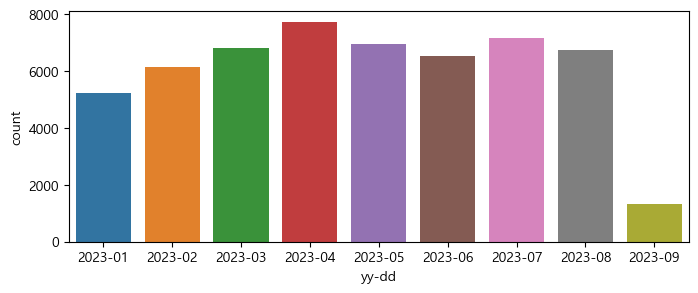

In [8]:
## 1) 월별 콜 건수
print(df_2['yy-dd'].value_counts()) 
sns.countplot(data=df_2, x='yy-dd')

유입경로
BDC               15600
ECOM               2491
DealerCampaign      437
DrivingCenter       360
0                   140
NSC                   8
Name: count, dtype: int64


<Axes: xlabel='유입경로', ylabel='count'>

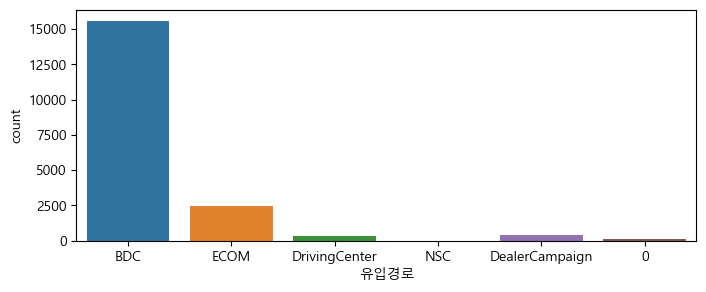

In [9]:
## 2) 유입경로별 구성
print(df_2['유입경로'].value_counts()) 
sns.countplot(data=df_2, x='유입경로')

캠페인유형
BDC               15600
ECOM               2491
DealerCampaign      437
DrivingCenter       360
NSC                   8
Name: count, dtype: int64


<Axes: xlabel='캠페인유형', ylabel='count'>

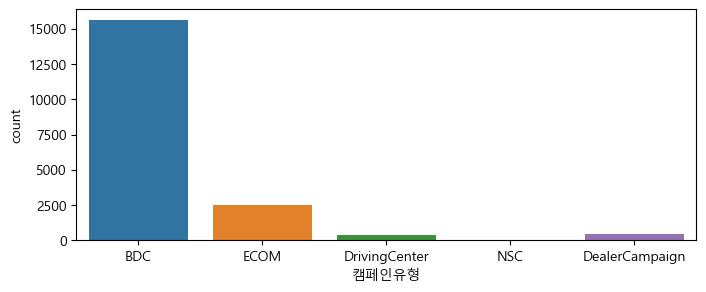

In [10]:
## 3) 캠페인유형별 구성
print(df_2['캠페인유형'].value_counts()) 
sns.countplot(data=df_2, x='캠페인유형')

유입 매체
social    90
Name: count, dtype: int64
-----------------------------------------------------------------
유입 채널
homepage     46
social       43
Instagram     1
Name: count, dtype: int64


<Axes: xlabel='유입 채널', ylabel='count'>

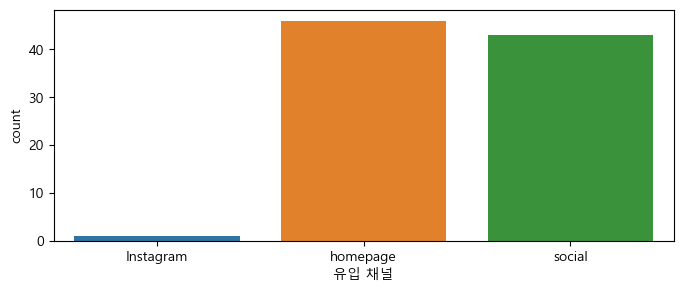

In [11]:
## 4) 전체 건중 유입매체가 social인 건의 비중 & 유입 채널별 구성비
print(df_2['유입 매체'].value_counts())

print('-----------------------------------------------------------------')

print(df_2['유입 채널'].value_counts()) 
sns.countplot(data=df_2, x='유입 채널')